# Text Classification

Given a text and label, calculate the term frequency and inverse which is the occurence of documents that has a term to determine the features needed for text classification. Classification method using SVM or Naive Bayes

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import pandas as pd

## Data Frame

In [90]:
df = pd.read_csv("./data/Articles.csv", sep=",", encoding= 'unicode_escape')
df

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business
...,...,...,...,...
2687,strong>DUBAI: Dubai International Airport and ...,3/25/2017,Laptop ban hits Dubai for 11m weekend traveller,business
2688,"strong>BEIJING: Former Prime Minister, Shaukat...",3/26/2017,Pak China relations not against any third coun...,business
2689,strong>WASHINGTON: Uber has grounded its fleet...,3/26/2017,Uber grounds self driving cars after accid,business
2690,strong>BEIJING: The New Development Bank plans...,3/27/2017,New Development Bank plans joint investments i...,business


In [110]:
df.isna().sum()

Article     0
Date        0
Heading     0
NewsType    0
dtype: int64

In [104]:
df['NewsType'].value_counts()

sports      1408
business    1284
Name: NewsType, dtype: int64

## SVM

Vectorizer determines the vector count for each word in the document. Using the Tf-Idf method, we calculate the result

In [91]:
pipes = Pipeline([
    ('vectorizer', TfidfVectorizer(max_df=0.95, min_df=1)),
    ('model', LinearSVC())
])

In [92]:
X_train, X_test, y_train, y_test = train_test_split(df['Article'], df['NewsType'], test_size=0.2, train_size=0.8, random_state=42)

In [93]:
pipes.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(max_df=0.95)),
                ('model', LinearSVC())])

In [94]:
y_pred = pipes.predict(X_test)

              precision    recall  f1-score   support

    business       1.00      1.00      1.00       262
      sports       1.00      1.00      1.00       277

    accuracy                           1.00       539
   macro avg       1.00      1.00      1.00       539
weighted avg       1.00      1.00      1.00       539



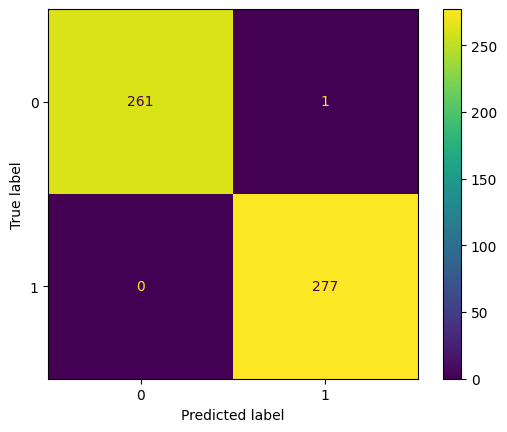

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

print(classification_report(y_test, y_pred))

## Naive Bayes

In [96]:
pipes2 = Pipeline([
    ('vectorizer', TfidfVectorizer(max_df=0.95, min_df=1)),
    ('model', MultinomialNB())
])

In [97]:
pipes2.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(max_df=0.95)),
                ('model', MultinomialNB())])

In [98]:
y_pred = pipes.predict(X_test)

              precision    recall  f1-score   support

    business       1.00      1.00      1.00       262
      sports       1.00      1.00      1.00       277

    accuracy                           1.00       539
   macro avg       1.00      1.00      1.00       539
weighted avg       1.00      1.00      1.00       539



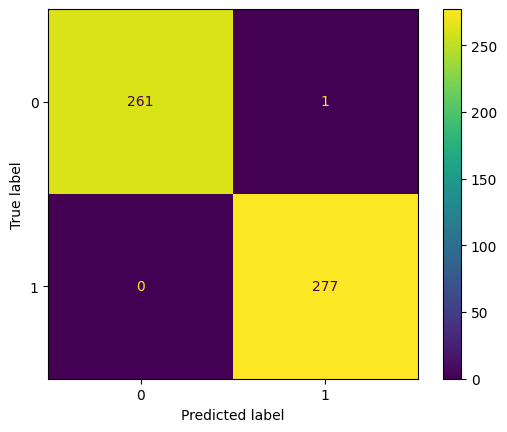

In [99]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

print(classification_report(y_test, y_pred))

In [100]:
y_test

1784      sports
2219      sports
368     business
535     business
2424      sports
          ...   
2624    business
1702      sports
353     business
208     business
610     business
Name: NewsType, Length: 539, dtype: object

In [109]:
arr = ["The national team has won first place in soccer", "The electoral system has failed", "The National Monetary System"]

y_pred = pipes.predict(arr)
y_pred

array(['sports', 'business', 'business'], dtype=object)